<a href="https://colab.research.google.com/github/aishwaryaishu009/License-Plate-Recognition/blob/main/soulpageAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

def unzip_file(zip_path, extract_to):
    """
    Unzips a .zip file to the specified directory.

    Args:
        zip_path (str): Path to the .zip file.
        extract_to (str): Directory to extract files into.
    """
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
            print(f"Successfully extracted to {extract_to}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
zip_path = "/content/drive/MyDrive/Colab Notebooks/Licplatesdetection_train.zip"  # Replace with the path to your .zip file
extract_to = "/content/drive/MyDrive/Colab Notebooks/train"  # Replace with the extraction directory

# Ensure the extraction directory exists
os.makedirs(extract_to, exist_ok=True)

unzip_file(zip_path, extract_to)

Successfully extracted to /content/drive/MyDrive/Colab Notebooks/train


In [ ]:
import zipfile
import os

def unzip_file(zip_path, extract_to):
    """
    Unzips a .zip file to the specified directory.

    Args:
        zip_path (str): Path to the .zip file.
        extract_to (str): Directory to extract files into.
    """
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
            print(f"Successfully extracted to {extract_to}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
zip_path = "/content/drive/MyDrive/Colab Notebooks/Licplatesrecognition_train.zip"  # Replace with the path to your .zip file
extract_to = "/content/drive/MyDrive/Colab Notebooks/label"  # Replace with the extraction directory

# Ensure the extraction directory exists
os.makedirs(extract_to, exist_ok=True)

unzip_file(zip_path, extract_to)

Successfully extracted to /content/drive/MyDrive/Colab Notebooks/label


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Paths
train_vehicle_path = "/content/drive/MyDrive/Colab Notebooks/train/license_plates_detection_train"  # Vehicle images with bounding box labels
train_plate_path = "/content/drive/MyDrive/Colab Notebooks/label/license_plates_recognition_train"  # License plate images with text labels
test_path = "/content/drive/MyDrive/Colab Notebooks/test"  # Test images

# Helper function to visualize images
def visualize_image(image_path, bbox=None, text=None):
    # Check if the file exists
    if not os.path.exists(image_path):
        print(f"Error: File not found at {image_path}")
        return

    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Unable to load the image from {image_path}")
        return

    # Convert BGR (OpenCV format) to RGB (Matplotlib format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Draw bounding box if provided
    if bbox:
        ymin, xmin, ymax, xmax = bbox
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    # Plot the image
    plt.imshow(image)
    plt.title(text if text else "Image")
    plt.axis("off")
    plt.show()


In [ ]:
# Define dataset paths
train_folder = '/content/drive/MyDrive/Colab Notebooks/train/license_plates_detection_train'    # Contains vehicle images
label_folder = '/content/drive/MyDrive/Colab Notebooks/label/license_plates_recognition_train'    # Contains license plate images
test_folder = '/content/drive/MyDrive/Colab Notebooks/test'      # Contains test vehicle images


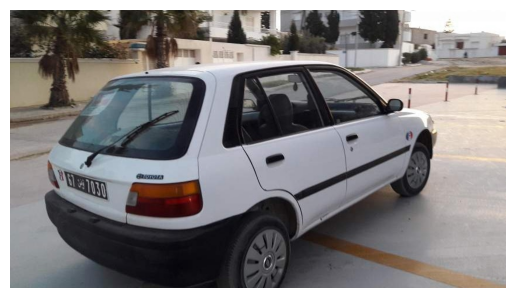

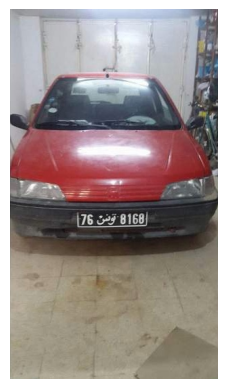

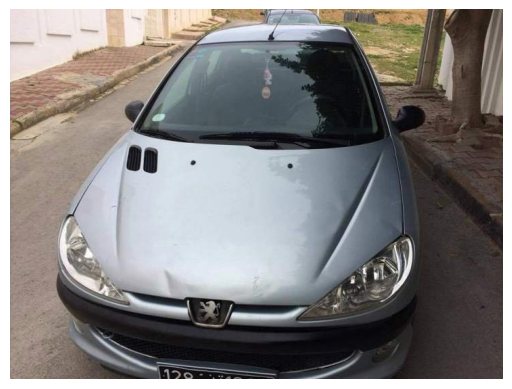

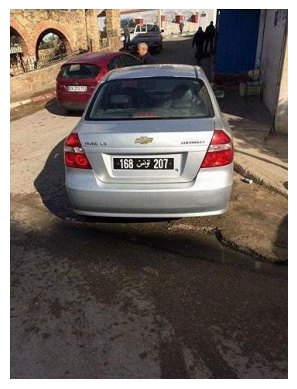

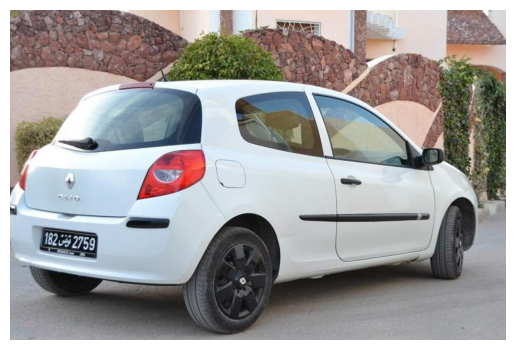

In [ ]:
def visualize_images(image_folder, n=5):
    images = os.listdir(image_folder)
    for i in range(n):
        image_path = os.path.join(image_folder, images[i])
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()

# Visualize 5 training images
visualize_images(train_folder)


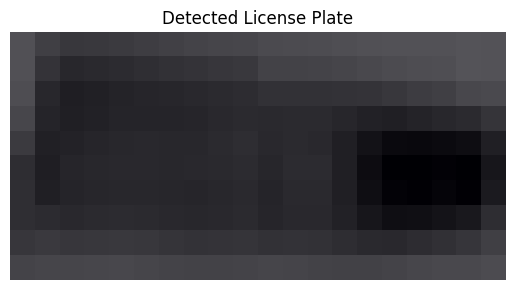

In [ ]:
def detect_license_plate(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)

    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if 2 <= w / h <= 5:  # Aspect ratio for license plates
            license_plate = image[y:y+h, x:x+w]
            return license_plate, (x, y, w, h)

    return None, None

# Example usage
image_path = os.path.join(train_folder, os.listdir(train_folder)[0])
image = cv2.imread(image_path)
license_plate, bbox = detect_license_plate(image)

if license_plate is not None:
    plt.imshow(cv2.cvtColor(license_plate, cv2.COLOR_BGR2RGB))
    plt.title("Detected License Plate")
    plt.axis("off")
    plt.show()


In [ ]:
!pip install tesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=c1f35692a61485e4dc54faf1adda967bbf8948da444a015a971a9bcd24956189
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [ ]:
pip install pytesseract


In [ ]:
pip install pillow


In [ ]:
import pytesseract
from PIL import Image
print("Libraries are installed successfully!")


Libraries are installed successfully!


In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract pillow


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,192 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,738 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.e

In [ ]:
import os

directory = '/content/drive/MyDrive/Colab Notebooks/train/license_plates_detection_train/'
print("Files in directory:", os.listdir(directory))


Files in directory: ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg'

In [ ]:
import pytesseract
from PIL import Image  # Import the Image module from the Pillow library
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Specify the path to Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Default path for Linux/Colab

# Define the directory containing the images
directory_path = '/content/drive/MyDrive/Colab Notebooks/train/license_plates_detection_train/'

# Check if the directory exists
if not os.path.exists(directory_path):
    print(f"Error: Directory '{directory_path}' not found. Please check the path.")
else:
    # List all files in the directory
    print("Files in directory:")
    files = os.listdir(directory_path)
    print(files)

    # Select the first image file (or specify a specific one)
    image_file = next((file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))), None)
    if not image_file:
        print("No image files found in the directory.")
    else:
        image_path = os.path.join(directory_path, image_file)

        # Load the image
        image = Image.open(image_path)

        # Use Tesseract OCR to extract text
        text = pytesseract.image_to_string(image)

        # Print the detected text
        print(f"Detected Text from {image_file}:", text)


Mounted at /content/drive
Files in directory:
['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '9

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the directory containing the images and labels
label_folder = '/content/drive/MyDrive/Colab Notebooks/label/license_plates_recognition_train'  # Update path

# Function to build the character recognition model
def build_character_recognition_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(36, activation='softmax')  # 0-9 and A-Z (total 36 characters)
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to preprocess license plate images
def preprocess_license_plate(image_path):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError(f"Image not found or unreadable: {image_path}")
        image_resized = cv2.resize(image, (64, 64))  # Resize to 64x64 pixels
        return image_resized / 255.0  # Normalize pixel values to range [0, 1]
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Load images and labels
license_plate_images = []
labels = []

# Assuming each image filename contains its single-character label, e.g., "A.jpg"
for img_name in os.listdir(label_folder):
    img_path = os.path.join(label_folder, img_name)

    # Extract label from the filename (e.g., "A.jpg" -> "A")
    label = img_name.split('.')[0]  # Remove file extension

    if len(label) == 1:  # Only accept single-character labels
        preprocessed_image = preprocess_license_plate(img_path)
        if preprocessed_image is not None:  # Ensure the image was processed correctly
            license_plate_images.append(preprocessed_image)
            labels.append(label)

# Debugging: Print counts
print(f"Total images processed: {len(license_plate_images)}")
print(f"Total labels collected: {len(labels)}")

# Convert characters to numeric labels (e.g., A-Z -> 10-35, 0-9 -> 0-9)
char_to_num = {char: idx for idx, char in enumerate("0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ")}
numeric_labels = [char_to_num[char] for char in labels]

# Convert images and labels to numpy arrays
X = np.array(license_plate_images).reshape(-1, 64, 64, 1)  # Add channel dimension
y = np.array(numeric_labels)

# Verify consistency of data
assert len(X) == len(y), f"Mismatch between images ({len(X)}) and labels ({len(y)})!"

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = build_character_recognition_model()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/label/license_plates_recognition_model.h5')
print("Model saved successfully!")





Total images processed: 10
Total labels collected: 10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 3.6583 - val_accuracy: 0.0000e+00 - val_loss: 4.0053
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.3750 - loss: 3.1596 - val_accuracy: 0.0000e+00 - val_loss: 4.5479
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.5000 - loss: 2.6398 - val_accuracy: 0.0000e+00 - val_loss: 5.6372
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6250 - loss: 2.0753 - val_accuracy: 0.0000e+00 - val_loss: 7.3660
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.8750 - loss: 1.5798 - val_accuracy: 0.0000e+00 - val_loss: 9.5214
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.8750 - loss: 1.1978 - val_accuracy: 0.0000e+00 - val_loss: 12.0428
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.8750 - loss: 0.8785 - val_accuracy: 0.0000e+00 - val_loss: 15.0740
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 1.0000 - loss: 0.6081 - v

Model saved successfully!


Total images processed: 10
Total labels collected: 10


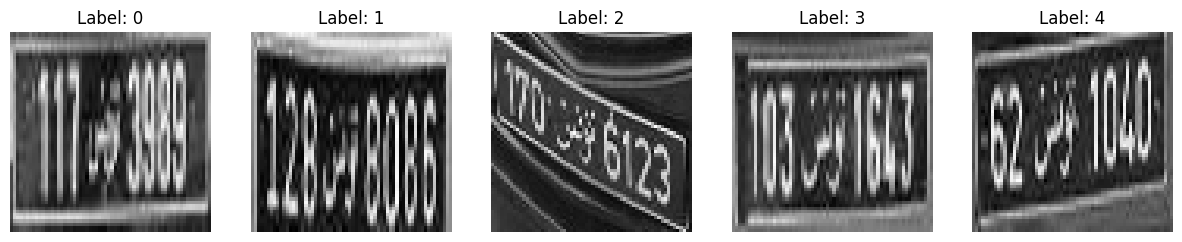

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1250 - loss: 3.5892 - val_accuracy: 0.0000e+00 - val_loss: 3.5155
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.3750 - loss: 3.1726 - val_accuracy: 0.0000e+00 - val_loss: 3.5292
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.3750 - loss: 2.6973 - val_accuracy: 0.0000e+00 - val_loss: 3.8336
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.2500 - loss: 2.2175 - val_accuracy: 0.0000e+00 - val_loss: 4.5120
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.3750 - loss: 1.8038 - val_accuracy: 0.0000e+00 - val_loss: 5.4529
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.5000 - loss: 1.4565 - val_accuracy: 0.0000e+00 - val_loss: 6.6025
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8750 - loss: 1.1571 - val_accuracy: 0.0000e+00 - val_loss: 8.0041
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 1.0000 - loss: 0.8984 - val_acc

Model saved successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.3821
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 13.2171
Training accuracy: 100.00%
Validation accuracy: 0.00%


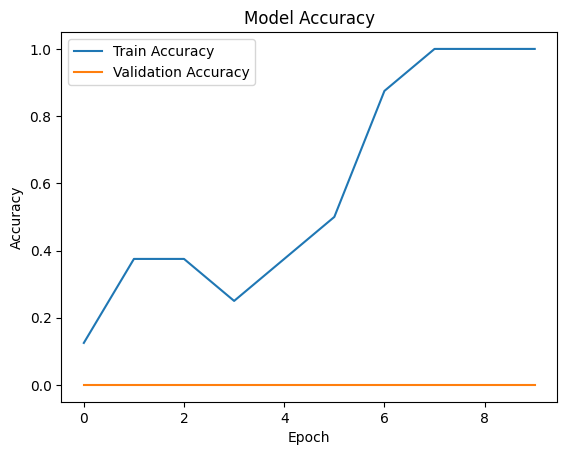

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted label: 0


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Define the directory containing the images and labels
label_folder = '/content/drive/MyDrive/Colab Notebooks/label/license_plates_recognition_train'  # Update path

# Function to build the character recognition model
def build_character_recognition_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(36, activation='softmax')  # 0-9 and A-Z (total 36 characters)
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to preprocess license plate images
def preprocess_license_plate(image_path):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError(f"Image not found or unreadable: {image_path}")
        image_resized = cv2.resize(image, (64, 64))  # Resize to 64x64 pixels
        return image_resized / 255.0  # Normalize pixel values to range [0, 1]
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Load images and labels
license_plate_images = []
labels = []

# Assuming each image filename contains its single-character label, e.g., "A.jpg"
for img_name in os.listdir(label_folder):
    img_path = os.path.join(label_folder, img_name)

    # Extract label from the filename (e.g., "A.jpg" -> "A")
    label = img_name.split('.')[0]  # Remove file extension

    if len(label) == 1:  # Only accept single-character labels
        preprocessed_image = preprocess_license_plate(img_path)
        if preprocessed_image is not None:  # Ensure the image was processed correctly
            license_plate_images.append(preprocessed_image)
            labels.append(label)

# Data exploration (checking dataset)
print(f"Total images processed: {len(license_plate_images)}")
print(f"Total labels collected: {len(labels)}")

# Display some example images from the dataset
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(license_plate_images[i], cmap='gray')
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')
plt.show()

# Convert characters to numeric labels (e.g., A-Z -> 10-35, 0-9 -> 0-9)
char_to_num = {char: idx for idx, char in enumerate("0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ")}
num_to_char = {idx: char for char, idx in char_to_num.items()}
numeric_labels = [char_to_num[char] for char in labels]

# Convert images and labels to numpy arrays
X = np.array(license_plate_images).reshape(-1, 64, 64, 1)  # Add channel dimension
y = np.array(numeric_labels)

# Verify consistency of data
assert len(X) == len(y), f"Mismatch between images ({len(X)}) and labels ({len(y)})!"

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = build_character_recognition_model()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/label/license_plates_recognition_model.h5')
print("Model saved successfully!")

# Evaluate the model on the training and validation sets
train_loss, train_acc = model.evaluate(X_train, y_train)
val_loss, val_acc = model.evaluate(X_val, y_val)

print(f"Training accuracy: {train_acc * 100:.2f}%")
print(f"Validation accuracy: {val_acc * 100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test the model on some new images
def test_model_on_image(image_path):
    image = preprocess_license_plate(image_path)
    if image is not None:
        image = image.reshape(1, 64, 64, 1)  # Add batch dimension
        prediction = model.predict(image)
        predicted_class = np.argmax(prediction, axis=1)
        print(f"Predicted label: {num_to_char[predicted_class[0]]}")

# Example: Test on the first image from the training set
test_image_path = os.path.join(label_folder, os.listdir(label_folder)[0])
test_model_on_image(test_image_path)
